<a href="https://colab.research.google.com/github/Ellen-Gu/Quantitative-Analysis/blob/main/Exploring_and_Advancing_in_AI_(part_3)_A_Journey_with_tensorflow%2C_pytorch%2C_LLMs%2C_Quantized_Models_and_APP_development%2C_and_Continuous_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After some tweaking, today I successfully quantized Facebook's CodeLlama-34b-Instruct, a finely-tuned Llama2 model tailored for coding applications. Post-quantization, the model's size remarkably shrank from 64GB to 18GB. Although it still slightly exceeds my GPU's memory capacity, by strategically transferring 35 of the 48 layers to the GPU, I've achieved sufficient speed for routine use. Below is a screenshot showcasing the chat-style prompt, distinguished by its eye-catching green text. It looks great!

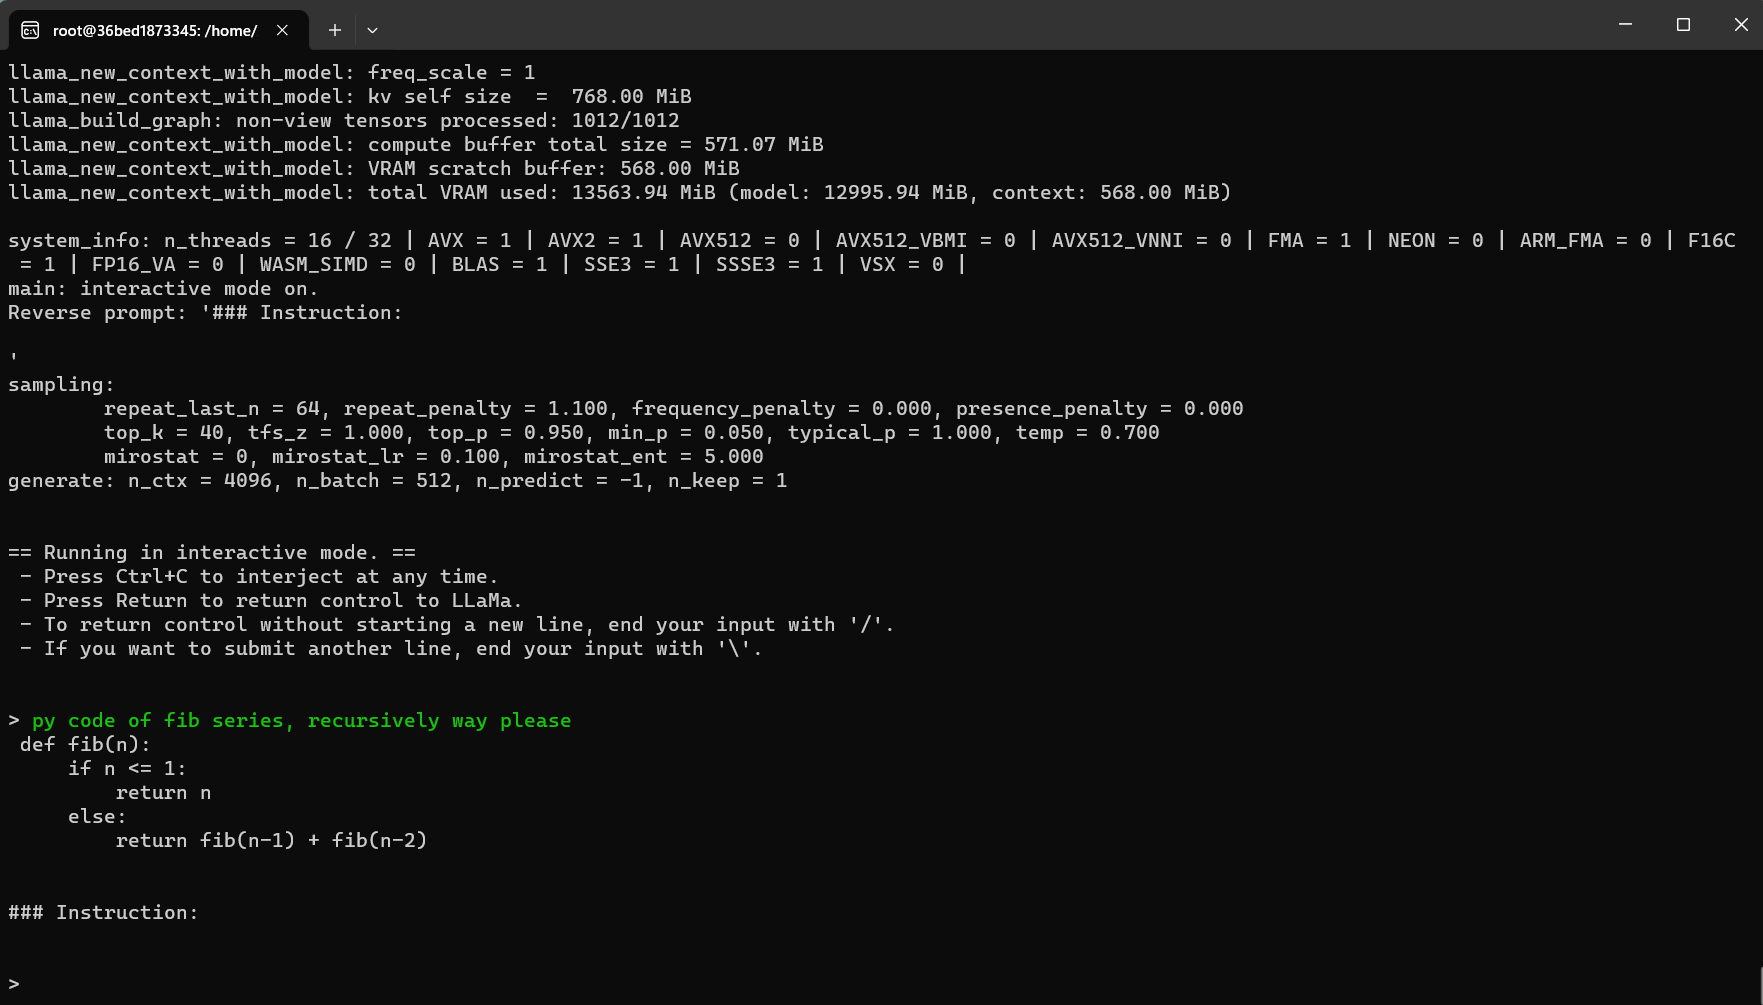

In [1]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/Colab Notebooks/codellama-quantize-4bit-34B-Instruct.png",width=1000))

Below are detailed insights into the quantized CodeLlama-34b-Instruct model, focusing on its performance and memory usage when loaded onto a GPU and utilizing VRAM:

In [ ]:
root@36bed1873345:/home/sharedspace/gguf-cpp-code/llama.cpp# cd /home/sharedspace/gguf-cpp-code/llama.cpp/models/34BI
root@36bed1873345:/home/sharedspace/gguf-cpp-code/llama.cpp/models/34BI# ls -l
total 84514040
-rw-r--r-- 1 root sharedspace 67490279392 Dec  3 20:43 ggml-model-f16.gguf
-rw-r--r-- 1 root sharedspace 19052048384 Dec  3 20:53 ggml-model-q4_0.gguf
root@36bed1873345:/home/sharedspace/gguf-cpp-code/llama.cpp/models/34BI# cd ../../
root@36bed1873345:/home/sharedspace/gguf-cpp-code/llama.cpp# pwd
/home/sharedspace/gguf-cpp-code/llama.cpp
root@36bed1873345:/home/sharedspace/gguf-cpp-code/llama.cpp# ./main -ngl 35 -m models/34BI/ggml-model-q4_0.gguf --color -c 4096 --temp 0.7 --repeat_penalty 1.1 -n -1 -i -ins
Log start
main: build = 1606 (fbbc428)
main: built with cc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0 for x86_64-linux-gnu
main: seed  = 1701640877
ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 1 CUDA devices:
  Device 0: NVIDIA GeForce RTX 4090 Laptop GPU, compute capability 8.9
llama_model_loader: loaded meta data with 17 key-value pairs and 435 tensors from models/34BI/ggml-model-q4_0.gguf (version GGUF V3 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q4_0     [  8192, 32000,     1,     1 ]
llama_model_loader: - tensor    1:               output_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor    2:                    output.weight q6_K     [  8192, 32000,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor    5:              blk.0.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor    6:         blk.0.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor    7:            blk.0.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor    8:            blk.0.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor    9:              blk.0.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   10:           blk.0.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   11:            blk.0.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   12:              blk.1.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   13:              blk.1.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   14:              blk.1.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   15:         blk.1.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   16:            blk.1.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   17:            blk.1.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   18:              blk.1.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   19:           blk.1.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   20:            blk.1.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   21:              blk.2.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   22:              blk.2.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   23:              blk.2.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   24:         blk.2.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   25:            blk.2.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   26:            blk.2.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   27:              blk.2.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   28:           blk.2.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   29:            blk.2.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   30:              blk.3.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   31:              blk.3.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   32:              blk.3.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   33:         blk.3.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   34:            blk.3.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   35:            blk.3.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   36:              blk.3.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   37:           blk.3.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   38:            blk.3.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   39:              blk.4.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   40:              blk.4.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   41:              blk.4.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   42:         blk.4.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   43:            blk.4.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   44:            blk.4.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   45:              blk.4.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   46:           blk.4.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   47:            blk.4.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   48:              blk.5.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   49:              blk.5.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   50:              blk.5.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   51:         blk.5.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   52:            blk.5.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   53:            blk.5.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   54:              blk.5.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   55:           blk.5.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   56:            blk.5.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   57:              blk.6.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   58:              blk.6.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   59:              blk.6.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   60:         blk.6.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   61:            blk.6.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   62:            blk.6.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   63:              blk.6.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   64:           blk.6.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   65:            blk.6.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   66:              blk.7.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   67:              blk.7.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   68:              blk.7.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   69:         blk.7.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   70:            blk.7.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   71:            blk.7.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   72:              blk.7.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   73:           blk.7.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   74:            blk.7.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   75:              blk.8.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   76:              blk.8.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   77:              blk.8.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   78:         blk.8.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   79:            blk.8.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   80:            blk.8.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   81:              blk.8.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   82:           blk.8.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   83:            blk.8.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   84:              blk.9.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   85:              blk.9.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   86:              blk.9.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   87:         blk.9.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   88:            blk.9.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   89:            blk.9.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   90:              blk.9.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   91:           blk.9.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   92:            blk.9.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor   93:             blk.10.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   94:             blk.10.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   95:             blk.10.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor   96:        blk.10.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor   97:           blk.10.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor   98:           blk.10.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor   99:             blk.10.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  100:          blk.10.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  101:           blk.10.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  102:             blk.11.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  103:             blk.11.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  104:             blk.11.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  105:        blk.11.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  106:           blk.11.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  107:           blk.11.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  108:             blk.11.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  109:          blk.11.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  110:           blk.11.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  111:             blk.12.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  112:             blk.12.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  113:             blk.12.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  114:        blk.12.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  115:           blk.12.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  116:           blk.12.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  117:             blk.12.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  118:          blk.12.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  119:           blk.12.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  120:             blk.13.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  121:             blk.13.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  122:             blk.13.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  123:        blk.13.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  124:           blk.13.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  125:           blk.13.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  126:             blk.13.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  127:          blk.13.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  128:           blk.13.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  129:             blk.14.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  130:             blk.14.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  131:             blk.14.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  132:        blk.14.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  133:           blk.14.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  134:           blk.14.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  135:             blk.14.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  136:          blk.14.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  137:           blk.14.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  138:             blk.15.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  139:             blk.15.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  140:             blk.15.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  141:        blk.15.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  142:           blk.15.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  143:           blk.15.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  144:             blk.15.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  145:          blk.15.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  146:           blk.15.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  147:             blk.16.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  148:             blk.16.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  149:             blk.16.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  150:        blk.16.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  151:           blk.16.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  152:           blk.16.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  153:             blk.16.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  154:          blk.16.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  155:           blk.16.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  156:             blk.17.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  157:             blk.17.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  158:             blk.17.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  159:        blk.17.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  160:           blk.17.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  161:           blk.17.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  162:             blk.17.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  163:          blk.17.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  164:           blk.17.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  165:             blk.18.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  166:             blk.18.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  167:             blk.18.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  168:        blk.18.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  169:           blk.18.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  170:           blk.18.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  171:             blk.18.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  172:          blk.18.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  173:           blk.18.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  174:             blk.19.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  175:             blk.19.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  176:             blk.19.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  177:        blk.19.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  178:           blk.19.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  179:           blk.19.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  180:             blk.19.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  181:          blk.19.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  182:           blk.19.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  183:             blk.20.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  184:             blk.20.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  185:             blk.20.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  186:        blk.20.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  187:           blk.20.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  188:           blk.20.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  189:             blk.20.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  190:          blk.20.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  191:           blk.20.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  192:             blk.21.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  193:             blk.21.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  194:             blk.21.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  195:        blk.21.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  196:           blk.21.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  197:           blk.21.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  198:             blk.21.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  199:          blk.21.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  200:           blk.21.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  201:             blk.22.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  202:             blk.22.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  203:             blk.22.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  204:        blk.22.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  205:           blk.22.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  206:           blk.22.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  207:             blk.22.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  208:          blk.22.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  209:           blk.22.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  210:             blk.23.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  211:             blk.23.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  212:             blk.23.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  213:        blk.23.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  214:           blk.23.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  215:           blk.23.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  216:             blk.23.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  217:          blk.23.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  218:           blk.23.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  219:             blk.24.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  220:             blk.24.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  221:             blk.24.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  222:        blk.24.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  223:           blk.24.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  224:           blk.24.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  225:             blk.24.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  226:          blk.24.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  227:           blk.24.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  228:             blk.25.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  229:             blk.25.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  230:             blk.25.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  231:        blk.25.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  232:           blk.25.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  233:           blk.25.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  234:             blk.25.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  235:          blk.25.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  236:           blk.25.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  237:             blk.26.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  238:             blk.26.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  239:             blk.26.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  240:        blk.26.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  241:           blk.26.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  242:           blk.26.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  243:             blk.26.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  244:          blk.26.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  245:           blk.26.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  246:             blk.27.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  247:             blk.27.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  248:             blk.27.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  249:        blk.27.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  250:           blk.27.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  251:           blk.27.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  252:             blk.27.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  253:          blk.27.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  254:           blk.27.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  255:             blk.28.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  256:             blk.28.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  257:             blk.28.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  258:        blk.28.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  259:           blk.28.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  260:           blk.28.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  261:             blk.28.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  262:          blk.28.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  263:           blk.28.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  264:             blk.29.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  265:             blk.29.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  266:             blk.29.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  267:        blk.29.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  268:           blk.29.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  269:           blk.29.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  270:             blk.29.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  271:          blk.29.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  272:           blk.29.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  273:             blk.30.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  274:             blk.30.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  275:             blk.30.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  276:        blk.30.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  277:           blk.30.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  278:           blk.30.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  279:             blk.30.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  280:          blk.30.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  281:           blk.30.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  282:             blk.31.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  283:             blk.31.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  284:             blk.31.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  285:        blk.31.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  286:           blk.31.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  287:           blk.31.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  288:             blk.31.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  289:          blk.31.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  290:           blk.31.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  291:             blk.32.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  292:             blk.32.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  293:             blk.32.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  294:        blk.32.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  295:           blk.32.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  296:           blk.32.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  297:             blk.32.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  298:          blk.32.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  299:           blk.32.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  300:             blk.33.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  301:             blk.33.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  302:             blk.33.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  303:        blk.33.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  304:           blk.33.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  305:           blk.33.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  306:             blk.33.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  307:          blk.33.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  308:           blk.33.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  309:             blk.34.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  310:             blk.34.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  311:             blk.34.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  312:        blk.34.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  313:           blk.34.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  314:           blk.34.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  315:             blk.34.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  316:          blk.34.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  317:           blk.34.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  318:             blk.35.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  319:             blk.35.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  320:             blk.35.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  321:        blk.35.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  322:           blk.35.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  323:           blk.35.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  324:             blk.35.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  325:          blk.35.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  326:           blk.35.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  327:             blk.36.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  328:             blk.36.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  329:             blk.36.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  330:        blk.36.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  331:           blk.36.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  332:           blk.36.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  333:             blk.36.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  334:          blk.36.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  335:           blk.36.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  336:             blk.37.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  337:             blk.37.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  338:             blk.37.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  339:        blk.37.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  340:           blk.37.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  341:           blk.37.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  342:             blk.37.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  343:          blk.37.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  344:           blk.37.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  345:             blk.38.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  346:             blk.38.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  347:             blk.38.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  348:        blk.38.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  349:           blk.38.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  350:           blk.38.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  351:             blk.38.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  352:          blk.38.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  353:           blk.38.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  354:             blk.39.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  355:             blk.39.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  356:             blk.39.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  357:        blk.39.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  358:           blk.39.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  359:           blk.39.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  360:             blk.39.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  361:          blk.39.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  362:           blk.39.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  363:             blk.40.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  364:             blk.40.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  365:             blk.40.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  366:        blk.40.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  367:           blk.40.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  368:           blk.40.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  369:             blk.40.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  370:          blk.40.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  371:           blk.40.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  372:             blk.41.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  373:             blk.41.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  374:             blk.41.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  375:        blk.41.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  376:           blk.41.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  377:           blk.41.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  378:             blk.41.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  379:          blk.41.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  380:           blk.41.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  381:             blk.42.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  382:             blk.42.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  383:             blk.42.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  384:        blk.42.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  385:           blk.42.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  386:           blk.42.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  387:             blk.42.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  388:          blk.42.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  389:           blk.42.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  390:             blk.43.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  391:             blk.43.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  392:             blk.43.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  393:        blk.43.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  394:           blk.43.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  395:           blk.43.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  396:             blk.43.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  397:          blk.43.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  398:           blk.43.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  399:             blk.44.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  400:             blk.44.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  401:             blk.44.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  402:        blk.44.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  403:           blk.44.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  404:           blk.44.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  405:             blk.44.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  406:          blk.44.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  407:           blk.44.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  408:             blk.45.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  409:             blk.45.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  410:             blk.45.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  411:        blk.45.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  412:           blk.45.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  413:           blk.45.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  414:             blk.45.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  415:          blk.45.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  416:           blk.45.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  417:             blk.46.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  418:             blk.46.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  419:             blk.46.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  420:        blk.46.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  421:           blk.46.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  422:           blk.46.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  423:             blk.46.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  424:          blk.46.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  425:           blk.46.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  426:             blk.47.attn_q.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  427:             blk.47.attn_k.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  428:             blk.47.attn_v.weight q4_0     [  8192,  1024,     1,     1 ]
llama_model_loader: - tensor  429:        blk.47.attn_output.weight q4_0     [  8192,  8192,     1,     1 ]
llama_model_loader: - tensor  430:           blk.47.ffn_gate.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  431:           blk.47.ffn_down.weight q4_0     [ 22016,  8192,     1,     1 ]
llama_model_loader: - tensor  432:             blk.47.ffn_up.weight q4_0     [  8192, 22016,     1,     1 ]
llama_model_loader: - tensor  433:          blk.47.attn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - tensor  434:           blk.47.ffn_norm.weight f32      [  8192,     1,     1,     1 ]
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = codellama
llama_model_loader: - kv   2:                       llama.context_length u32              = 16384
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 8192
llama_model_loader: - kv   4:                          llama.block_count u32              = 48
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 22016
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32              = 64
llama_model_loader: - kv   8:              llama.attention.head_count_kv u32              = 8
llama_model_loader: - kv   9:     llama.attention.layer_norm_rms_epsilon f32              = 0.000010
llama_model_loader: - kv  10:                       llama.rope.freq_base f32              = 1000000.000000
llama_model_loader: - kv  11:                          general.file_type u32              = 2
llama_model_loader: - kv  12:                       tokenizer.ggml.model str              = llama
llama_model_loader: - kv  13:                      tokenizer.ggml.tokens arr[str,32000]   = ["<unk>", "<s>", "</s>", "<0x00>", "<...
llama_model_loader: - kv  14:                      tokenizer.ggml.scores arr[f32,32000]   = [0.000000, 0.000000, 0.000000, 0.0000...
llama_model_loader: - kv  15:                  tokenizer.ggml.token_type arr[i32,32000]   = [2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...
llama_model_loader: - kv  16:               general.quantization_version u32              = 2
llama_model_loader: - type  f32:   97 tensors
llama_model_loader: - type q4_0:  337 tensors
llama_model_loader: - type q6_K:    1 tensors
llm_load_vocab: special tokens definition check successful ( 259/32000 ).
llm_load_print_meta: format           = GGUF V3 (latest)
llm_load_print_meta: arch             = llama
llm_load_print_meta: vocab type       = SPM
llm_load_print_meta: n_vocab          = 32000
llm_load_print_meta: n_merges         = 0
llm_load_print_meta: n_ctx_train      = 16384
llm_load_print_meta: n_embd           = 8192
llm_load_print_meta: n_head           = 64
llm_load_print_meta: n_head_kv        = 8
llm_load_print_meta: n_layer          = 48
llm_load_print_meta: n_rot            = 128
llm_load_print_meta: n_gqa            = 8
llm_load_print_meta: f_norm_eps       = 0.0e+00
llm_load_print_meta: f_norm_rms_eps   = 1.0e-05
llm_load_print_meta: f_clamp_kqv      = 0.0e+00
llm_load_print_meta: f_max_alibi_bias = 0.0e+00
llm_load_print_meta: n_ff             = 22016
llm_load_print_meta: rope scaling     = linear
llm_load_print_meta: freq_base_train  = 1000000.0
llm_load_print_meta: freq_scale_train = 1
llm_load_print_meta: n_yarn_orig_ctx  = 16384
llm_load_print_meta: rope_finetuned   = unknown
llm_load_print_meta: model type       = 34B
llm_load_print_meta: model ftype      = mostly Q4_0
llm_load_print_meta: model params     = 33.74 B
llm_load_print_meta: model size       = 17.74 GiB (4.52 BPW)
llm_load_print_meta: general.name     = codellama
llm_load_print_meta: BOS token        = 1 '<s>'
llm_load_print_meta: EOS token        = 2 '</s>'
llm_load_print_meta: UNK token        = 0 '<unk>'
llm_load_print_meta: LF token         = 13 '<0x0A>'
llm_load_tensors: ggml ctx size =    0.16 MiB
llm_load_tensors: using CUDA for GPU acceleration
llm_load_tensors: mem required  = 5172.96 MiB
llm_load_tensors: offloading 35 repeating layers to GPU
llm_load_tensors: offloaded 35/51 layers to GPU
llm_load_tensors: VRAM used: 12995.94 MiB
....................................................................................................
llama_new_context_with_model: n_ctx      = 4096
llama_new_context_with_model: freq_base  = 1000000.0
llama_new_context_with_model: freq_scale = 1
llama_new_context_with_model: kv self size  =  768.00 MiB
llama_build_graph: non-view tensors processed: 1012/1012
llama_new_context_with_model: compute buffer total size = 571.07 MiB
llama_new_context_with_model: VRAM scratch buffer: 568.00 MiB
llama_new_context_with_model: total VRAM used: 13563.94 MiB (model: 12995.94 MiB, context: 568.00 MiB)

system_info: n_threads = 16 / 32 | AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 |
main: interactive mode on.
Reverse prompt: '### Instruction:

'
sampling:
        repeat_last_n = 64, repeat_penalty = 1.100, frequency_penalty = 0.000, presence_penalty = 0.000
        top_k = 40, tfs_z = 1.000, top_p = 0.950, min_p = 0.050, typical_p = 1.000, temp = 0.700
        mirostat = 0, mirostat_lr = 0.100, mirostat_ent = 5.000
generate: n_ctx = 4096, n_batch = 512, n_predict = -1, n_keep = 1


== Running in interactive mode. ==
 - Press Ctrl+C to interject at any time.
 - Press Return to return control to LLaMa.
 - To return control without starting a new line, end your input with '/'.
 - If you want to submit another line, end your input with '\'.


> py code of fib series, recursively way please
 def fib(n):
     if n <= 1:
         return n
     else:
         return fib(n-1) + fib(n-2)


### Instruction:


>
 is there a way to do that recursively?


### Response:

 def fib(n):
     if n <= 1:
         return n
     else:
         return fib(n-1) + fib(n-2)


### Instruction:


>

llama_print_timings:        load time =    3254.66 ms
llama_print_timings:      sample time =      18.63 ms /   114 runs   (    0.16 ms per token,  6119.16 tokens per second)
llama_print_timings: prompt eval time =    2285.15 ms /    31 tokens (   73.71 ms per token,    13.57 tokens per second)
llama_print_timings:        eval time =   21711.77 ms /   114 runs   (  190.45 ms per token,     5.25 tokens per second)
llama_print_timings:       total time = 1103775.03 ms